In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/Users/dipeshkumar/Desktop/NOTES/DL/Churn_Modelling.csv.xls')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
#Scaling large values
x = x = pd.get_dummies(df.drop(columns=['Exited']), columns=['Geography', 'Gender'], drop_first=True)
# Target variable
y = df['Exited']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [11]:
x_train.shape

(8000, 11)

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [14]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [15]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(3,activation='sigmoid',input_dim=11)) 
model.add(Dense(1,activation='sigmoid'))   

In [21]:
#model = Sequential()                                            #Adding more hidden layes and increasing nodes
#model.add(Dense(11,activation='relu',input_dim=11)) 
#model.add(Dense(11,activation='relu')) 
#model.add(Dense(1,activation='sigmoid'))   

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
history = model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.7972 - val_loss: 0.4943 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 574us/step - loss: 0.4829 - accuracy: 0.7972 - val_loss: 0.4770 - val_accuracy: 0.7975
Epoch 3/100
200/200 [==============================] - 0s 574us/step - loss: 0.4682 - accuracy: 0.7972 - val_loss: 0.4653 - val_accuracy: 0.7975
Epoch 4/100
200/200 [==============================] - 0s 561us/step - loss: 0.4576 - accuracy: 0.7972 - val_loss: 0.4569 - val_accuracy: 0.7975
Epoch 5/100
200/200 [==============================] - 0s 568us/step - loss: 0.4497 - accuracy: 0.7972 - val_loss: 0.4507 - val_accuracy: 0.7975
Epoch 6/100
200/200 [==============================] - 0s 585us/step - loss: 0.4437 - accuracy: 0.7972 - val_loss: 0.4461 - val_accuracy: 0.7975
Epoch 7/100
200/200 [==============================] - 0s 580us/step - loss: 0.4392 - accuracy: 0.7972 - val_loss: 0.4424 - val_accu

200/200 [==============================] - 0s 593us/step - loss: 0.4063 - accuracy: 0.8381 - val_loss: 0.4126 - val_accuracy: 0.8225
Epoch 58/100
200/200 [==============================] - 0s 568us/step - loss: 0.4062 - accuracy: 0.8383 - val_loss: 0.4125 - val_accuracy: 0.8225
Epoch 59/100
200/200 [==============================] - 0s 570us/step - loss: 0.4061 - accuracy: 0.8388 - val_loss: 0.4125 - val_accuracy: 0.8225
Epoch 60/100
200/200 [==============================] - 0s 569us/step - loss: 0.4059 - accuracy: 0.8384 - val_loss: 0.4123 - val_accuracy: 0.8231
Epoch 61/100
200/200 [==============================] - 0s 602us/step - loss: 0.4058 - accuracy: 0.8388 - val_loss: 0.4123 - val_accuracy: 0.8238
Epoch 62/100
200/200 [==============================] - 0s 586us/step - loss: 0.4057 - accuracy: 0.8389 - val_loss: 0.4122 - val_accuracy: 0.8238
Epoch 63/100
200/200 [==============================] - 0s 592us/step - loss: 0.4055 - accuracy: 0.8394 - val_loss: 0.4121 - val_accuracy

In [20]:
model.layers[0].get_weights()

[array([[-0.08579031,  0.20682539,  0.02237103],
        [ 0.06812875, -3.4775646 , -2.2966986 ],
        [ 0.07361957, -0.02778303,  0.1680091 ],
        [-0.47119325,  0.10948026, -0.65544325],
        [ 0.16624412,  0.10477398, -0.10129279],
        [ 0.06230931, -0.29797798,  0.95424575],
        [ 2.443183  , -1.2758096 , -0.00697698],
        [-0.07635098,  0.21646027, -0.70632446],
        [-0.6449694 , -0.17184044, -1.2398682 ],
        [-0.0414348 , -0.49423254,  0.78224075],
        [ 0.78445965,  0.10155047,  0.49181214]], dtype=float32),
 array([ 0.08036234,  0.24802186, -0.2966507 ], dtype=float32)]

In [21]:
model.layers[1].get_weights()

[array([[-2.2254164],
        [-2.2992854],
        [-0.9493797]], dtype=float32),
 array([1.1724353], dtype=float32)]

In [22]:
y_log = model.predict(x_test_scaled)

63/63 [==============================] - 0s 387us/step


In [23]:
#create threshold to convert values to 0 & 1
y_pred = np.where(y_log>0.5,1,0)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.833

In [42]:
# Save the model
model.save('sequential_model.h5')

/Users/dipeshkumar/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
import matplotlib.pyplot as plt

In [26]:
history.history

{'loss': [0.5057905912399292,
  0.48285308480262756,
  0.4681639075279236,
  0.4575901925563812,
  0.4496931731700897,
  0.44366225600242615,
  0.4391603171825409,
  0.4355412423610687,
  0.43283408880233765,
  0.43064606189727783,
  0.4289515018463135,
  0.4275384247303009,
  0.42639437317848206,
  0.4254630208015442,
  0.4245392084121704,
  0.4237369894981384,
  0.4229711592197418,
  0.4223051965236664,
  0.42153653502464294,
  0.4208531081676483,
  0.4201686382293701,
  0.4194616377353668,
  0.4187619686126709,
  0.41803526878356934,
  0.41735565662384033,
  0.4166813790798187,
  0.41605427861213684,
  0.4154812693595886,
  0.4148833453655243,
  0.414307564496994,
  0.4138004779815674,
  0.4133409857749939,
  0.4128091037273407,
  0.41236430406570435,
  0.4118993878364563,
  0.4115082621574402,
  0.41115066409111023,
  0.41082504391670227,
  0.4104219079017639,
  0.410091757774353,
  0.40976062417030334,
  0.40947040915489197,
  0.40924176573753357,
  0.4089219570159912,
  0.4086766

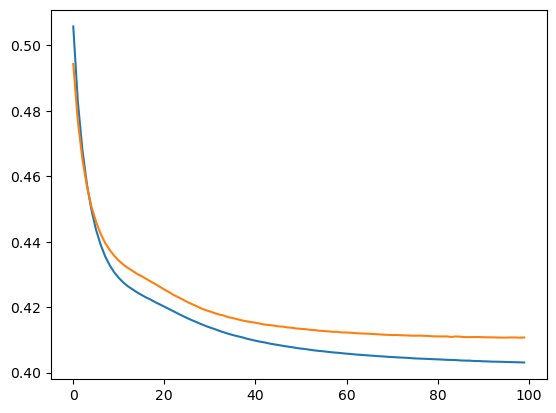

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

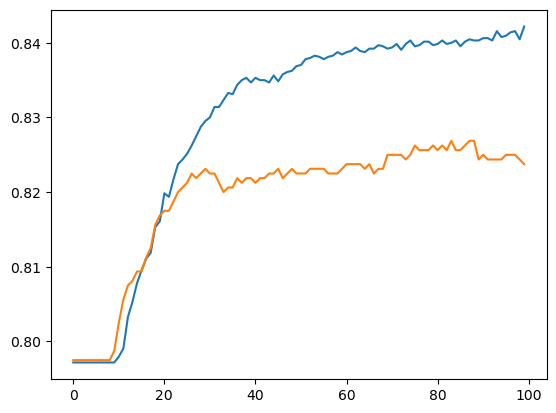

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])